Loading OULAD datasets...
✓ All datasets loaded successfully

=== STUDENT INFO ===
Shape: (32593, 12)

Columns: ['code_module', 'code_presentation', 'id_student', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result']

First few rows:
  code_module code_presentation  id_student gender                region  \
0         AAA             2013J       11391      M   East Anglian Region   
1         AAA             2013J       28400      F              Scotland   
2         AAA             2013J       30268      F  North Western Region   
3         AAA             2013J       31604      F     South East Region   
4         AAA             2013J       32885      F  West Midlands Region   

       highest_education imd_band age_band  num_of_prev_attempts  \
0       HE Qualification  90-100%     55<=                     0   
1       HE Qualification   20-30%    35-55                     0   
2  A Level or Equival

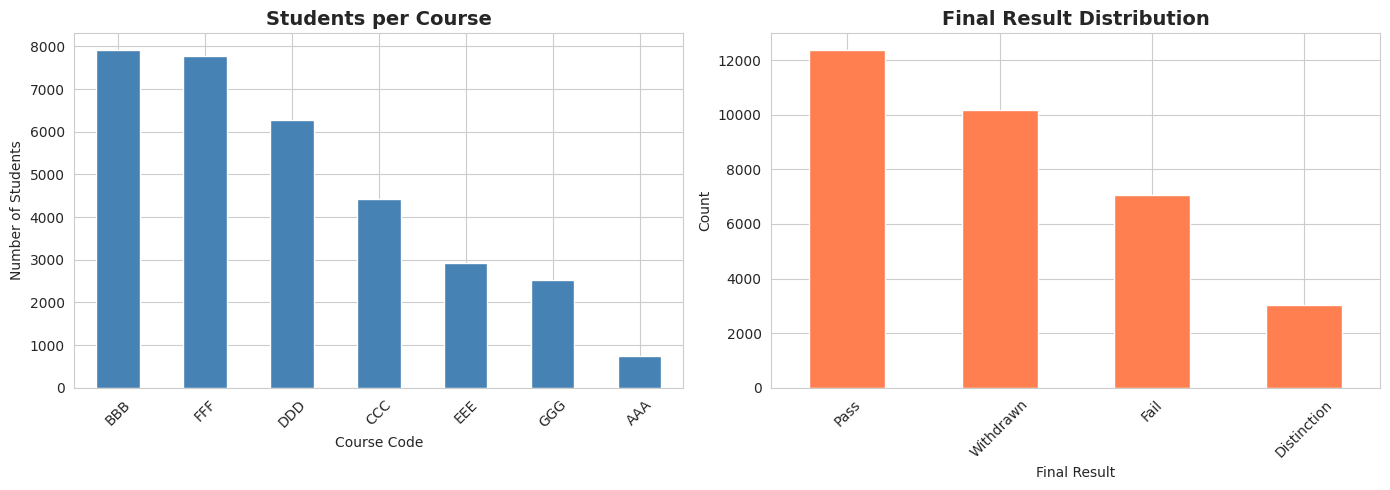


=== STUDENT ASSESSMENTS ===
Shape: (173912, 5)
Columns: ['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score']

Score statistics:
count    173739.000000
mean         75.799573
std          18.798107
min           0.000000
25%          65.000000
50%          80.000000
75%          90.000000
max         100.000000
Name: score, dtype: float64

Missing scores: 173

=== STUDENT VLE INTERACTIONS ===
Shape: (10655280, 6)
Unique students: 26074
Total interactions: 39,605,099

Activity statistics:
count    26074.000000
mean      1518.949873
std       1935.994635
min          1.000000
25%        298.000000
50%        824.000000
75%       2018.000000
max      28615.000000
Name: sum_click, dtype: float64


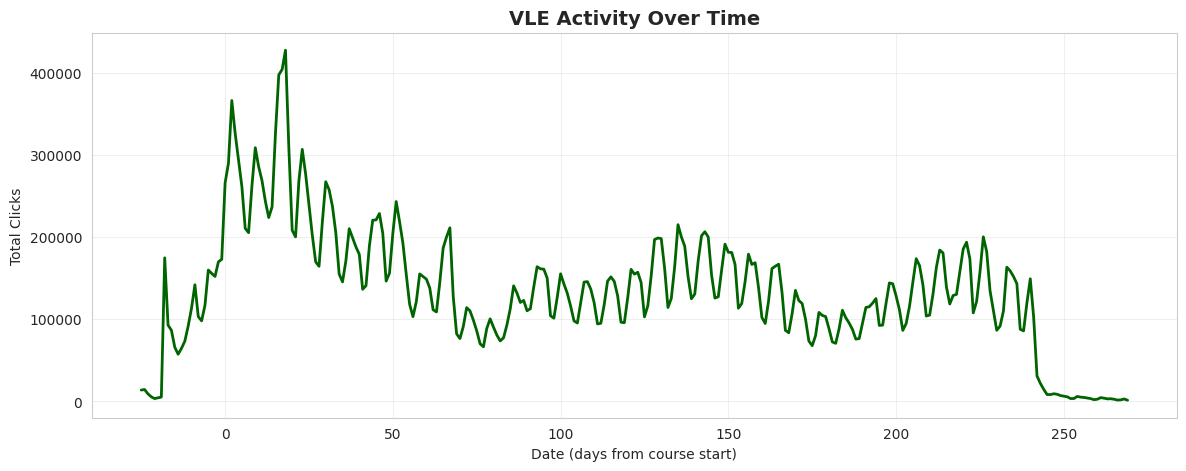


=== COURSE SELECTION FOR PROTOTYPE ===
  course  n_students  vle_coverage  assess_coverage  avg_coverage
0    AAA         748      0.938503         0.905080      0.921791
6    GGG        2534      0.930939         0.831492      0.881215
2    CCC        4434      0.905728         0.829048      0.867388
4    EEE        2934      0.903885         0.791070      0.847478
5    FFF        7762      0.878124         0.784720      0.831422
3    DDD        6272      0.866071         0.757494      0.811783
1    BBB        7909      0.821596         0.755216      0.788406

🎯 RECOMMENDED COURSES FOR PROTOTYPE:
  AAA: 748 students, 92.2% avg coverage
  GGG: 2534 students, 88.1% avg coverage
  CCC: 4434 students, 86.7% avg coverage

✓ Selected courses saved to data/selected_courses.txt
✓ Next step: Run 02_preprocessing.ipynb


In [1]:
"""
Exploratory Data Analysis for OULAD Dataset

Run this notebook to understand the data structure and choose courses for prototyping.
"""

# %% Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# %% Define paths
DATA_PATH = Path("../data/raw")

# %% Load core datasets
print("Loading OULAD datasets...")

student_info = pd.read_csv(DATA_PATH / "studentInfo.csv")
student_assessment = pd.read_csv(DATA_PATH / "studentAssessment.csv")
student_vle = pd.read_csv(DATA_PATH / "studentVle.csv")
assessments = pd.read_csv(DATA_PATH / "assessments.csv")
courses = pd.read_csv(DATA_PATH / "courses.csv")
vle = pd.read_csv(DATA_PATH / "vle.csv")
student_registration = pd.read_csv(DATA_PATH / "studentRegistration.csv")

print("✓ All datasets loaded successfully")

# %% Explore student_info
print("\n=== STUDENT INFO ===")
print(f"Shape: {student_info.shape}")
print(f"\nColumns: {student_info.columns.tolist()}")
print(f"\nFirst few rows:")
print(student_info.head())
print(f"\nInfo:")
print(student_info.info())
print(f"\nMissing values:")
print(student_info.isnull().sum())

# %% Unique courses and presentations
print("\n=== COURSES & PRESENTATIONS ===")
print(f"Unique courses: {student_info['code_module'].nunique()}")
print(f"Course codes: {student_info['code_module'].unique()}")
print(f"\nUnique presentations: {student_info['code_presentation'].nunique()}")
print(f"Presentations: {student_info['code_presentation'].unique()}")

# Student counts per course
course_counts = student_info.groupby('code_module').size().sort_values(ascending=False)
print(f"\nStudents per course:")
print(course_counts)

# %% Visualize course distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Students per course
course_counts.plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Students per Course', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Course Code')
axes[0].set_ylabel('Number of Students')
axes[0].tick_params(axis='x', rotation=45)

# Final result distribution
student_info['final_result'].value_counts().plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Final Result Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Final Result')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../results/course_overview.png', dpi=300, bbox_inches='tight')
plt.show()

# %% Explore student_assessment
print("\n=== STUDENT ASSESSMENTS ===")
print(f"Shape: {student_assessment.shape}")
print(f"Columns: {student_assessment.columns.tolist()}")
print(f"\nScore statistics:")
print(student_assessment['score'].describe())
print(f"\nMissing scores: {student_assessment['score'].isnull().sum()}")

# %% Explore student_vle
print("\n=== STUDENT VLE INTERACTIONS ===")
print(f"Shape: {student_vle.shape}")
print(f"Unique students: {student_vle['id_student'].nunique()}")
print(f"Total interactions: {student_vle['sum_click'].sum():,.0f}")
print(f"\nActivity statistics:")
print(student_vle.groupby('id_student')['sum_click'].sum().describe())

# %% VLE activity over time
vle_timeline = student_vle.groupby('date')['sum_click'].sum().sort_index()

plt.figure(figsize=(14, 5))
plt.plot(vle_timeline.index, vle_timeline.values, linewidth=2, color='darkgreen')
plt.title('VLE Activity Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date (days from course start)')
plt.ylabel('Total Clicks')
plt.grid(alpha=0.3)
plt.savefig('../results/vle_timeline.png', dpi=300, bbox_inches='tight')
plt.show()

# %% Choose courses for prototyping
print("\n=== COURSE SELECTION FOR PROTOTYPE ===")

# Calculate coverage metrics per course
course_stats = []
for course in student_info['code_module'].unique():
    course_students = student_info[student_info['code_module'] == course]['id_student']
    n_students = len(course_students)
    
    # VLE coverage
    vle_students = student_vle[student_vle['id_student'].isin(course_students)]['id_student'].nunique()
    vle_coverage = vle_students / n_students if n_students > 0 else 0
    
    # Assessment coverage
    assess_students = student_assessment[student_assessment['id_student'].isin(course_students)]['id_student'].nunique()
    assess_coverage = assess_students / n_students if n_students > 0 else 0
    
    course_stats.append({
        'course': course,
        'n_students': n_students,
        'vle_coverage': vle_coverage,
        'assess_coverage': assess_coverage,
        'avg_coverage': (vle_coverage + assess_coverage) / 2
    })

course_stats_df = pd.DataFrame(course_stats).sort_values('avg_coverage', ascending=False)
print(course_stats_df)

# Recommend top courses
print("\n🎯 RECOMMENDED COURSES FOR PROTOTYPE:")
top_courses = course_stats_df.nlargest(3, 'avg_coverage')
for idx, row in top_courses.iterrows():
    print(f"  {row['course']}: {row['n_students']} students, "
          f"{row['avg_coverage']:.1%} avg coverage")

# %% Save selected courses
selected_courses = top_courses['course'].tolist()
with open('../data/selected_courses.txt', 'w') as f:
    f.write('\n'.join(selected_courses))

print(f"\n✓ Selected courses saved to data/selected_courses.txt")
print(f"✓ Next step: Run 02_preprocessing.ipynb")